In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Carregar o DataFrame com os dados dos filmes
df = pd.read_csv('dados.csv')

# 3. Combinar título, sinopse e gênero em uma única coluna
df['Features'] = df['Titulo'] + ' ' + df['Sinopse'] + ' ' + df['Genero'] + ' ' + df['Pais'] + ' ' + df['Ano'].astype(str) + ' ' + df['Minutagem'].astype(str)

# Criar um vetorizador TF-IDF para converter o texto em recursos numéricos
vectorizer = TfidfVectorizer(stop_words='english')  
X = vectorizer.fit_transform(df['Features'])

# Criar e treinar o modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Função para recomendar filmes com base na entrada do usuário
def recommend_movies(user_input):
    # Vetorizar a entrada do usuário
    entrada_usuario_vector = vectorizer.transform([user_input])

    # Encontrar os filmes mais próximos da entrada do usuário
    distances, indices = knn.kneighbors(entrada_usuario_vector)
    
    # Criar um DataFrame com os filmes recomendados
    recommended_movies_df = df.iloc[indices[0]][['Titulo', 'Sinopse', 'Genero']]

    return recommended_movies_df

# Solicitar entrada do usuário
user_input = "Romantic"

# Recomendar filmes com base na entrada do usuário
recommended_movies = recommend_movies(user_input)

# Exibir os títulos e sinopses dos filmes recomendados
recommended_movies

,Titulo,Sinopse,Genero
796,She's the One,when his best friend gets stranded in the rain...,"Dramas, International Movies, Romantic Movies"
4636,Mission: Destroy Love,two strangers meet by chance on a trip to thai...,"Comedies, International Movies, Romantic Movies"
4576,Mandobasar Galpo,with the assistance of a psychiatrist an accl...,"Dramas, International Movies, Romantic Movies"
2615,What the Jatt!!,a peasant from punjab and his best friend pose...,"Comedies, International Movies, Romantic Movies"
4579,Manhattan Romance,a filmmaker working on a documentary about lov...,"Comedies, Independent Movies, Romantic Movies"


In [2]:
!pip install psutil

Defaulting to user installation because normal site-packages is not writeable


Verdadeiros Positivos: 17
Falsos Positivos: 2
Verdadeiros Negativos: 18
Falsos Negativos: 5
Acurácia: 0.6188679245283019


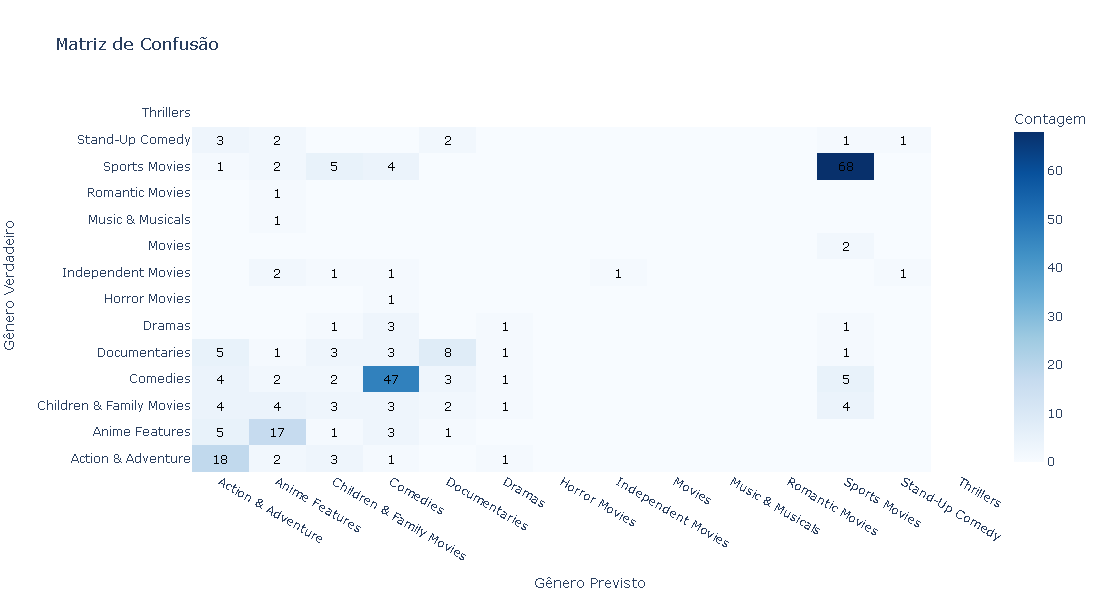

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objects as go

# Carregar os dados dos filmes
df = pd.read_csv("dados.csv")

# Filtrar filmes com gênero único
df = df[df['Genero'].apply(lambda x: len(x.split(',')) == 1)]

# Dividir os dados em conjunto de treinamento e teste
X = df.drop('Genero', axis=1)
y = df['Genero']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorizar a sinopse usando TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train['Sinopse'])
X_test = vectorizer.transform(X_test['Sinopse'])

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculando manualmente os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
fn = conf_matrix[1, 0]

# Imprimir os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
print("Verdadeiros Positivos:", tp)
print("Falsos Positivos:", fp)
print("Verdadeiros Negativos:", tn)
print("Falsos Negativos:", fn)
print("Acurácia:", accuracy)

# Plotar a matriz de confusão usando Plotly
fig = go.Figure(data=go.Heatmap(z=conf_matrix,
                                 x=knn.classes_,
                                 y=knn.classes_,
                                 colorscale='Blues',
                                 colorbar=dict(title='Contagem'),
                                 hoverongaps=False))
fig.update_layout(title='Matriz de Confusão',
                  xaxis=dict(title='Gênero Previsto', automargin=True),
                  yaxis=dict(title='Gênero Verdadeiro', automargin=True),
                  width=800, height=600,
                  font=dict(size=12),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"))
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        if conf_matrix[i][j] != 0:
            fig.add_annotation(x=knn.classes_[j], y=knn.classes_[i], text=str(conf_matrix[i][j]),
                               showarrow=False, font=dict(color='black', size=12))
fig.show()